In [2]:
import os
os.getcwd()

'E:\\Complete Machine Learning'

In [3]:
os.chdir('E:\\Complete Machine Learning\\Car price')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [218]:
train=pd.read_csv('train.csv')

In [219]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
train.shape

(19237, 18)

In [220]:
attributes=['Levy', 'Manufacturer', 'Model', 
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
        'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

In [79]:
attributes

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [221]:
[feature for feature in attributes if (train[train[feature].values=='-'].count()[0])]

['Levy']

In [222]:
(train[train['Color'].values=='-'].count()[0])

0

In [68]:
train['Cylinders']

0        6.0
1        6.0
2        4.0
3        4.0
4        4.0
        ... 
19232    4.0
19233    4.0
19234    4.0
19235    4.0
19236    4.0
Name: Cylinders, Length: 19237, dtype: float64

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [82]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [225]:
train['Levy']=np.where(train['Levy']=='-','NaN',train['Levy'])

In [226]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [227]:
numerical_feature=[feature for feature in train.columns if train[feature].dtypes!='O']

In [95]:
numerical_feature

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [228]:
categorical_feature=[feature for feature in train.columns if train[feature].dtypes=='O']

In [100]:
print(categorical_feature)

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [229]:
discrete_feature=[feature for feature in numerical_feature if train[feature].nunique()<25]

In [230]:
categorical_discrete_feature=[feature for feature in categorical_feature if train[feature].nunique()<15]

In [139]:
categorical_discrete_feature

['Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel']

In [109]:
discrete_feature

['Cylinders', 'Airbags']

In [231]:
train['Levy'].nunique()<35

False

In [110]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]

In [111]:
continuous_feature

['ID', 'Price', 'Prod. year']

In [236]:
train['Levy'].replace({'NaN':train['Levy'].median()},inplace=True)

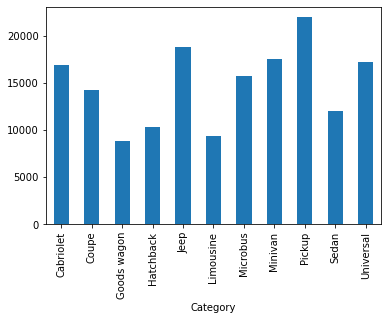

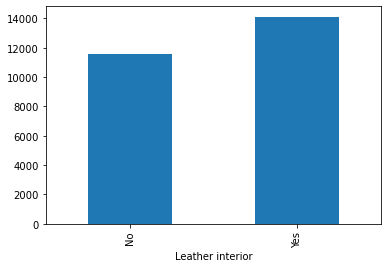

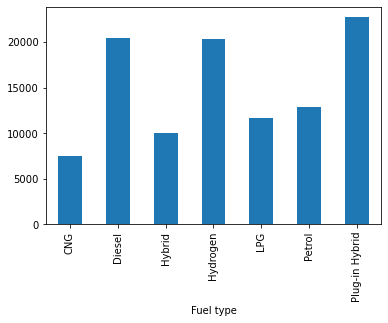

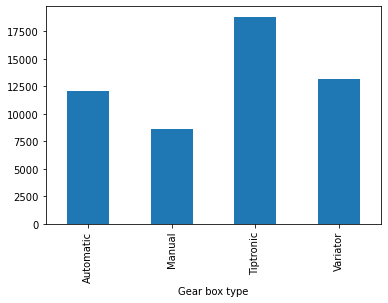

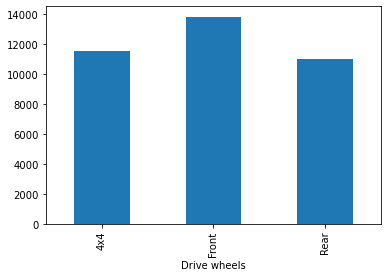

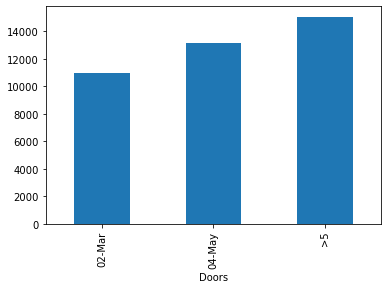

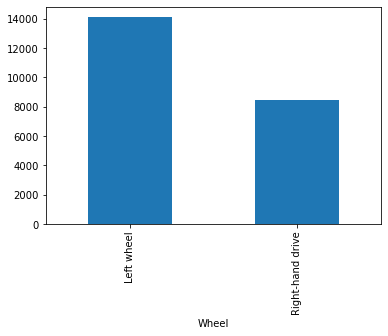

In [138]:
for feature in categorical_discrete_feature:
    train.groupby(feature)['Price'].median().plot.bar()
    plt.show()

In [143]:
train['Manufacturer'].nunique()

65

In [232]:
test=pd.read_csv('test.csv')

In [145]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [233]:
[feature for feature in attributes if (test[test[feature].values=='-'].count()[0])]

['Levy']

In [234]:
test['Levy']=np.where(test['Levy']=='-','Nan',test['Levy'])

In [235]:
test['Levy'].replace({'Nan':test["Levy"].median()},inplace=True)

In [237]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,784.0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,784.0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,784.0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,784.0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [238]:
train['source']='train'
test['source']='test'

In [239]:
data=pd.concat([train,test],axis=0)

In [159]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,NaN,1357.0,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4.0,Manual,Front,04-May,Left wheel,Blue,6,test
8241,45682346,NaN,784.0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6,test
8242,45649860,NaN,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0,test
8243,45809706,NaN,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4.0,Automatic,Front,04-May,Left wheel,Green,4,test


In [240]:
data['Levy'].dtypes

dtype('float64')

In [155]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [161]:
data['Manufacturer'].value_counts()

HYUNDAI          5358
TOYOTA           5177
MERCEDES-BENZ    2983
FORD             1592
CHEVROLET        1520
                 ... 
LANCIA              1
HAVAL               1
MG                  1
TATA                1
PONTIAC             1
Name: Manufacturer, Length: 68, dtype: int64

In [183]:
l1=train['Manufacturer'].value_counts().sort_values(ascending=True).index

In [181]:
l1

GREATWALL           1
HAVAL               1
LAMBORGHINI         1
LANCIA              1
TESLA               1
                 ... 
CHEVROLET        1069
FORD             1111
MERCEDES-BENZ    2076
TOYOTA           3662
HYUNDAI          3769
Name: Manufacturer, Length: 65, dtype: int32

In [166]:
test['Manufacturer'].value_counts()

HYUNDAI          1589
TOYOTA           1515
MERCEDES-BENZ     907
FORD              481
LEXUS             451
                 ... 
MOSKVICH            1
ASTON MARTIN        1
FOTON               1
HUMMER              1
TATA                1
Name: Manufacturer, Length: 62, dtype: int64

In [241]:
label_ordered=data.groupby(["Manufacturer"])['Price'].mean().sort_values(ascending=False).index

In [242]:
label_ordered={k:i for i,k in enumerate(label_ordered,1)}

In [246]:
print(label_ordered)

{'LAMBORGHINI': 1, 'BENTLEY': 2, 'OPEL': 3, 'FERRARI': 4, 'LAND ROVER': 5, 'ASTON MARTIN': 6, 'TESLA': 7, 'PORSCHE': 8, 'JAGUAR': 9, 'HUMMER': 10, 'SSANGYONG': 11, 'JEEP': 12, 'HYUNDAI': 13, 'BMW': 14, 'MASERATI': 15, 'INFINITI': 16, 'LEXUS': 17, 'MERCEDES-BENZ': 18, 'სხვა': 19, 'MINI': 20, 'SCION': 21, 'FORD': 22, 'KIA': 23, 'SKODA': 24, 'HAVAL': 25, 'CHEVROLET': 26, 'HONDA': 27, 'TOYOTA': 28, 'AUDI': 29, 'SATURN': 30, 'LINCOLN': 31, 'CADILLAC': 32, 'PEUGEOT': 33, 'MITSUBISHI': 34, 'MERCURY': 35, 'LANCIA': 36, 'SUZUKI': 37, 'VOLKSWAGEN': 38, 'RENAULT': 39, 'FIAT': 40, 'BUICK': 41, 'CITROEN': 42, 'GAZ': 43, 'VOLVO': 44, 'GREATWALL': 45, 'NISSAN': 46, 'SUBARU': 47, 'ALFA ROMEO': 48, 'ISUZU': 49, 'MAZDA': 50, 'CHRYSLER': 51, 'DODGE': 52, 'DAEWOO': 53, 'SAAB': 54, 'GMC': 55, 'PONTIAC': 56, 'ACURA': 57, 'DAIHATSU': 58, 'UAZ': 59, 'SEAT': 60, 'VAZ': 61, 'MOSKVICH': 62, 'ZAZ': 63, 'ROVER': 64, 'ROLLS-ROYCE': 65, 'FOTON': 66, 'MG': 67, 'TATA': 68}


In [244]:
label=data.groupby(["Manufacturer"])['Price'].mean().sort_values(ascending=False)

In [245]:
label

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
FERRARI         66955.500000
LAND ROVER      54053.489796
                   ...      
ROVER            2433.333333
ROLLS-ROYCE       178.500000
FOTON                    NaN
MG                       NaN
TATA                     NaN
Name: Price, Length: 68, dtype: float64

In [247]:
data[data['Manufacturer']=='FOTON']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
4756,45789178,NaN,2390.0,FOTON,transit,2004,Microbus,No,Diesel,2.9,112000 km,4.0,Manual,Rear,04-May,Left wheel,Yellow,0,test


In [255]:
train.groupby(['Manufacturer']).value_counts().sort_values()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [263]:
lbs=train['Manufacturer'].value_counts().sort_values(ascending=False).index
lbs={k:i for i ,k in enumerate(lbs,1)}
train['Manufacturer']=train['Manufacturer'].map(lbs)
train['Manufacturer']

0        7
1        5
2        8
3        4
4        8
        ..
19232    3
19233    1
19234    1
19235    5
19236    1
Name: Manufacturer, Length: 19237, dtype: int64

In [206]:
test.groupby(['Manufacturer'])['Price'].mean()

Manufacturer
ACURA          NaN
ALFA ROMEO     NaN
ASTON MARTIN   NaN
AUDI           NaN
BENTLEY        NaN
                ..
VAZ            NaN
VOLKSWAGEN     NaN
VOLVO          NaN
ZAZ            NaN
სხვა           NaN
Name: Price, Length: 62, dtype: float64

In [249]:
data['Manufacturer']=data['Manufacturer'].map(label_ordered)

In [251]:
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399.0,17,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018.0,26,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781.0,27,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862.0,22,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446.0,27,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train
5,45802912,39493.0,891.0,13,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,train
6,45656768,1803.0,761.0,28,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12,train
7,45816158,549.0,751.0,13,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12,train
8,45641395,1098.0,394.0,28,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,train
9,45756839,26657.0,781.0,17,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train


In [252]:
data

Sonata            1557
Prius             1531
Camry             1328
Elantra           1300
E 350              800
                  ... 
Outlander xl         1
Sonic LT             1
CLK 280              1
Passat tdi sel       1
IS 250 TURBO         1
Name: Model, Length: 1981, dtype: int64

In [253]:
new=data.copy()

In [254]:
new.groupby('Model')

In [264]:
data['Doors']

0       04-May
1       04-May
2       04-May
3       04-May
4       04-May
         ...  
8240    04-May
8241    04-May
8242    04-May
8243    04-May
8244    04-May
Name: Doors, Length: 27482, dtype: object

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                27482 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              27482 non-null  float64
 3   Manufacturer      27482 non-null  int64  
 4   Model             27482 non-null  int64  
 5   Prod. year        27482 non-null  int64  
 6   Category          27482 non-null  object 
 7   Leather interior  27482 non-null  object 
 8   Fuel type         27482 non-null  object 
 9   Engine volume     27482 non-null  object 
 10  Mileage           27482 non-null  object 
 11  Cylinders         27482 non-null  float64
 12  Gear box type     27482 non-null  object 
 13  Drive wheels      27482 non-null  object 
 14  Doors             27482 non-null  object 
 15  Wheel             27482 non-null  object 
 16  Color             27482 non-null  object 

In [41]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [42]:
train['source']='train'
test['source']='test'

In [43]:
data=pd.concat([train,test],axis=0)

In [44]:
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train
5,45802912,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,train
6,45656768,1803.0,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12,train
7,45816158,549.0,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12,train
8,45641395,1098.0,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,train
9,45756839,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train


In [45]:
train['Levy']=np.where(train['Levy']=='-','NaN',train["Levy"])

In [46]:
train['Levy'].replace({'NaN':train['Levy'].median()},inplace=True)

In [47]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [48]:
test['Levy']=np.where(test['Levy']=='-','NaN',test['Levy'])
test['Levy'].replace({'NaN':test["Levy"].median()},inplace=True)

In [54]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,source
0,44020629,784.0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,test
1,45784798,784.0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,test
2,45800257,784.0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,test
3,45797981,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,test
4,45814303,784.0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,test


In [55]:
data=pd.concat([train,test],axis=0)

In [56]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [57]:
label_ordered=data['Manufacturer'].value_counts().index

In [58]:
label_ordered={k:i for i,k in enumerate(label_ordered,1)}

In [59]:
data['Manufacturer']=data['Manufacturer'].map(label_ordered)

In [60]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399.0,7,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018.0,5,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781.0,8,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862.0,4,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446.0,8,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [23]:
import seaborn as sns


In [25]:
numerical_feature=[feature for feature in data.columns if data[feature].dtypes!='O']
print(numerical_feature)

['ID', 'Price', 'Levy', 'Manufacturer', 'Prod. year', 'Cylinders', 'Airbags']


In [26]:
cor=data.corr()

In [27]:
cor

,ID,Price,Levy,Manufacturer,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000844,0.012491,-0.047439,0.070181,-0.032212,-0.014193
Price,-0.000844,1.000000,0.003828,0.004591,0.012982,0.007518,-0.012824
Levy,0.012491,0.003828,1.000000,0.031586,-0.014038,0.377123,0.081645
Manufacturer,-0.047439,0.004591,0.031586,1.000000,-0.242522,0.065013,-0.066964
Prod. year,0.070181,0.012982,-0.014038,-0.242522,1.000000,-0.072717,0.236227
Cylinders,-0.032212,0.007518,0.377123,0.065013,-0.072717,1.000000,0.140130
Airbags,-0.014193,-0.012824,0.081645,-0.066964,0.236227,0.140130,1.000000


<AxesSubplot:>

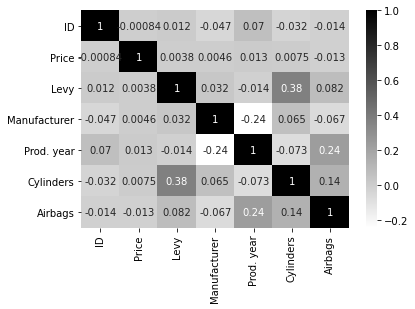

In [32]:
sns.heatmap(cor,cmap='binary',annot=True)

In [33]:
n_row=new['Manufacturer'].nunique()
range(n_row)

NameError: name 'new' is not defined

In [61]:
label=data['Model'].value_counts().index
label

Index(['Sonata', 'Prius', 'Camry', 'Elantra', 'E 350', 'Santa FE', 'H1', 'FIT',
       'Tucson', 'X5',
       ...
       'Jetta 2.5 SE', '535 comfort-sport', 'Fusion HYBRID', 'Estima hibrid',
       'C 240 W 203', 'FIT S', 'Jetta s', 'Land Cruiser PRADO', 'Panamera S',
       'Vitz funkargo'],
      dtype='object', length=1981)

In [62]:
label={k:i for i,k in enumerate(label,1)}
label

{'Sonata': 1,
 'Prius': 2,
 'Camry': 3,
 'Elantra': 4,
 'E 350': 5,
 'Santa FE': 6,
 'H1': 7,
 'FIT': 8,
 'Tucson': 9,
 'X5': 10,
 'Aqua': 11,
 'Cruze': 12,
 'Fusion': 13,
 'GX 460': 14,
 'Optima': 15,
 'Highlander': 16,
 'Transit': 17,
 'Actyon': 18,
 'Jetta': 19,
 'ML 350': 20,
 'Civic': 21,
 'RX 450': 22,
 'REXTON': 23,
 'RAV 4': 24,
 'GX 470': 25,
 'Astra': 26,
 'Volt': 27,
 'Escape': 28,
 'Juke': 29,
 'Captiva': 30,
 'CT 200h': 31,
 'Lacetti': 32,
 'Passat': 33,
 'Forester': 34,
 'Prius C': 35,
 'Insight': 36,
 'Genesis': 37,
 'Orlando': 38,
 'Tacoma': 39,
 '328': 40,
 'RX 350': 41,
 'Malibu': 42,
 'E 300': 43,
 'Focus': 44,
 'Korando': 45,
 'Sprinter': 46,
 'CHR': 47,
 'Tiida': 48,
 'Corolla': 49,
 'Cr-v': 50,
 'Vectra': 51,
 'Golf': 52,
 'Vito': 53,
 'Vitz': 54,
 'A4': 55,
 'GLE 350': 56,
 'Note': 57,
 '528': 58,
 'C 180': 59,
 'E 320': 60,
 'Pajero IO': 61,
 'Fiesta': 62,
 'Accent': 63,
 'XV': 64,
 'Explorer': 65,
 'Outlander': 66,
 'C-MAX': 67,
 'GLA 250': 68,
 'Sportage': 69,

In [63]:
data['Model']=data['Model'].map(label)

In [64]:
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399.0,7,22,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018.0,5,122,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781.0,8,8,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862.0,4,28,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446.0,8,8,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [65]:
data=pd.get_dummies(data,columns=['Category'],drop_first=True,)

In [66]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328.0,1399.0,7,22,2010,Yes,Hybrid,3.5,186005 km,...,0,0,0,1,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,No,Petrol,3,192000 km,...,0,0,0,1,0,0,0,0,0,0
2,45774419,8467.0,781.0,8,8,2006,No,Petrol,1.3,200000 km,...,0,0,1,0,0,0,0,0,0,0
3,45769185,3607.0,862.0,4,28,2011,Yes,Hybrid,2.5,168966 km,...,0,0,0,1,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,Yes,Petrol,1.3,91901 km,...,0,0,1,0,0,0,0,0,0,0


In [67]:
data['Leather interior']=np.where(data['Leather interior']=='Yes',1,0)

In [68]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328.0,1399.0,7,22,2010,1,Hybrid,3.5,186005 km,...,0,0,0,1,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,0,Petrol,3,192000 km,...,0,0,0,1,0,0,0,0,0,0
2,45774419,8467.0,781.0,8,8,2006,0,Petrol,1.3,200000 km,...,0,0,1,0,0,0,0,0,0,0
3,45769185,3607.0,862.0,4,28,2011,1,Hybrid,2.5,168966 km,...,0,0,0,1,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,1,Petrol,1.3,91901 km,...,0,0,1,0,0,0,0,0,0,0


In [69]:
data['Fuel type'].value_counts()

Petrol            14492
Diesel             5773
Hybrid             5089
LPG                1307
CNG                 701
Plug-in Hybrid      118
Hydrogen              2
Name: Fuel type, dtype: int64

In [73]:
labels_ordered=data['Fuel type'].value_counts().index

In [77]:
labels_ordered={k:i for i,k in enumerate(labels_ordered,1)}
data['Fuel type']=data['Fuel type'].map(labels_ordered)

In [81]:
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328.0,1399.0,7,22,2010,1,3,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train,0,0,0,1,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,0,1,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train,0,0,0,1,0,0,0,0,0,0
2,45774419,8467.0,781.0,8,8,2006,0,1,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train,0,0,1,0,0,0,0,0,0,0
3,45769185,3607.0,862.0,4,28,2011,1,3,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train,0,0,0,1,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,1,1,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train,0,0,1,0,0,0,0,0,0,0


In [101]:
data['Mileage']=data['Mileage'].str.replace('km','')

In [130]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,45654403,13328.0,1399.0,7,22,2010,1,3,3.5,186005,6.0,4,Left wheel,Silver,12,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,0,1,3,192000,6.0,4,Left wheel,Black,8,train,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,45774419,8467.0,781.0,8,8,2006,0,1,1.3,200000,4.0,4,Right-hand drive,Black,2,train,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,45769185,3607.0,862.0,4,28,2011,1,3,2.5,168966,4.0,4,Left wheel,White,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,1,1,1.3,91901,4.0,4,Left wheel,Silver,4,train,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    27482 non-null  int64  
 1   Price                 19237 non-null  float64
 2   Levy                  27482 non-null  float64
 3   Manufacturer          27482 non-null  int64  
 4   Model                 27482 non-null  int64  
 5   Prod. year            27482 non-null  int64  
 6   Leather interior      27482 non-null  int32  
 7   Fuel type             27482 non-null  int64  
 8   Engine volume         27482 non-null  object 
 9   Mileage               27482 non-null  object 
 10  Cylinders             27482 non-null  float64
 11  Gear box type         27482 non-null  object 
 12  Drive wheels          27482 non-null  object 
 13  Doors                 27482 non-null  object 
 14  Wheel                 27482 non-null  object 
 15  Color               

In [107]:
data['Gear box type'].value_counts()

Automatic    19296
Tiptronic     4463
Manual        2675
Variator      1048
Name: Gear box type, dtype: int64

In [108]:
data=pd.get_dummies(data,columns=['Gear box type'],drop_first=True)

In [111]:
data=pd.get_dummies(data,columns=['Drive wheels'],drop_first=True)

In [129]:
data['Doors'].value_counts()

4    26173
2     1129
5      180
Name: Doors, dtype: int64

In [122]:
data['Doors']=data['Doors'].str.replace('-Mar','')

In [125]:
data['Doors']=np.where(data['Doors']=='>5',5,data['Doors'])

In [128]:
data['Doors']=data['Doors'].astype(int)

In [131]:
data['Wheel'].value_counts()

Left wheel          25384
Right-hand drive     2098
Name: Wheel, dtype: int64

In [132]:
data['Wheel']=np.where(data['Wheel']=='Left wheel',1,0)

In [140]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,45654403,13328.0,1399.0,7,22,2010,1,3,3.5,186005,6.0,4,1,14,12,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,0,1,3,192000,6.0,4,1,16,8,train,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,45774419,8467.0,781.0,8,8,2006,0,1,1.3,200000,4.0,4,0,16,2,train,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,45769185,3607.0,862.0,4,28,2011,1,3,2.5,168966,4.0,4,1,15,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,1,1,1.3,91901,4.0,4,1,14,4,train,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [135]:
label_ordered=data['Color'].value_counts().sort_values(ascending=True).index

In [137]:
label_ordered={k:i for i,k in enumerate(label_ordered,1)}

In [139]:
data['Color']=data['Color'].map(label_ordered)

In [142]:
train=data[data['source']=='train']

In [143]:
test=data[data['source']=='test']

In [144]:
train.shape,test.shape

((19237, 31), (8245, 31))

In [211]:
train.to_csv('X_train.csv',index=False)

In [183]:
train=pd.read_csv('X_train.csv')

In [147]:
data['Engine volume'].value_counts()

2            5587
2.5          3200
1.8          2526
1.6          2063
1.5          1867
             ... 
0.4 Turbo       1
1.1 Turbo       1
6.6             1
0.2 Turbo       1
7.3             1
Name: Engine volume, Length: 112, dtype: int64

In [177]:
ls=(train['Engine volume'].str.contains('Turbo'))
ls

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
19232    False
19233      NaN
19234      NaN
19235      NaN
19236      NaN
Name: Engine volume, Length: 19237, dtype: object

In [171]:
q=ls[ls==True].index


Int64Index([   23,    25,    30,    34,    42,    52,    56,    59,    60,
               75,
            ...
            19128, 19151, 19158, 19159, 19167, 19170, 19190, 19200, 19225,
            19232],
           dtype='int64', length=1931)

In [284]:
train['Engine volume'][q]=train['Engine volume'][q].str.replace('Turbo','',regex=True)

<ipython-input-284-796e8f10af18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Engine volume'][q]=train['Engine volume'][q].str.replace('Turbo','',regex=True)


In [186]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,45654403,13328.0,1399.0,7,22,2010,1,3,3.5,186005,6.0,4,1,14,12,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,44731507,16621.0,1018.0,5,122,2011,0,1,3,192000,6.0,4,1,16,8,train,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,45774419,8467.0,781.0,8,8,2006,0,1,1.3,200000,4.0,4,0,16,2,train,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,45769185,3607.0,862.0,4,28,2011,1,3,2.5,168966,4.0,4,1,15,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45809263,11726.0,446.0,8,8,2014,1,1,1.3,91901,4.0,4,1,14,4,train,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [188]:
test.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,44020629,NaN,784.0,10,52,2012,0,2,2.0 Turbo,0,4.0,2,1,13,10,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,45784798,NaN,784.0,1,1,2012,1,1,2.4,26000,4.0,4,1,13,10,test,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,45800257,NaN,784.0,9,48,2005,0,1,1.5,168000,4.0,4,0,4,8,test,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,45797981,NaN,975.0,33,301,2012,1,1,3.2,143000,6.0,4,1,12,12,test,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45814303,NaN,784.0,13,26,1993,0,1,1.6,200000,4.0,4,1,16,0,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [191]:
ls=test['Engine volume'].str.contains('Turbo')
ls

0        True
1       False
2       False
3       False
4       False
        ...  
8240    False
8241     True
8242    False
8243    False
8244    False
Name: Engine volume, Length: 8245, dtype: bool

In [192]:
q=ls[ls==True].index

In [194]:
test['Engine volume'][q]=test['Engine volume'][q].str.replace('Turbo','')

<ipython-input-194-b44cbcddc8c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Engine volume'][q]=test['Engine volume'][q].str.replace('Turbo','')
C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\series.py:1031: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
C:\Users\Manan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code

In [195]:
test.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,44020629,NaN,784.0,10,52,2012,0,2,2.0,0,4.0,2,1,13,10,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,45784798,NaN,784.0,1,1,2012,1,1,2.4,26000,4.0,4,1,13,10,test,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,45800257,NaN,784.0,9,48,2005,0,1,1.5,168000,4.0,4,0,4,8,test,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,45797981,NaN,975.0,33,301,2012,1,1,3.2,143000,6.0,4,1,12,12,test,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45814303,NaN,784.0,13,26,1993,0,1,1.6,200000,4.0,4,1,16,0,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [214]:
test.to_csv('X_test.csv',index=False)

In [197]:
test.drop(['Price'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [198]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,44020629,784.0,10,52,2012,0,2,2.0,0,4.0,2,1,13,10,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,45784798,784.0,1,1,2012,1,1,2.4,26000,4.0,4,1,13,10,test,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,45800257,784.0,9,48,2005,0,1,1.5,168000,4.0,4,0,4,8,test,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,45797981,975.0,33,301,2012,1,1,3.2,143000,6.0,4,1,12,12,test,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45814303,784.0,13,26,1993,0,1,1.6,200000,4.0,4,1,16,0,test,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [203]:
y_train=train['Price']

In [205]:
train.drop(['Price'],axis=1,inplace=True)

In [204]:
y_train

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19232     8467.0
19233    15681.0
19234    26108.0
19235     5331.0
19236      470.0
Name: Price, Length: 19237, dtype: float64

In [206]:
train.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,source,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,45654403,1399.0,7,22,2010,1,3,3.5,186005,6.0,4,1,14,12,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,44731507,1018.0,5,122,2011,0,1,3,192000,6.0,4,1,16,8,train,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,45774419,781.0,8,8,2006,0,1,1.3,200000,4.0,4,0,16,2,train,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,45769185,862.0,4,28,2011,1,3,2.5,168966,4.0,4,1,15,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,45809263,446.0,8,8,2014,1,1,1.3,91901,4.0,4,1,14,4,train,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [208]:
y_train.to_csv('y_train.csv',index=False)

In [210]:
train.drop(['source'],axis=1,inplace=True)

In [212]:
test.drop(['source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [225]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [226]:
X_train=pd.read_csv('X_train.csv')

In [230]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [220]:
y_val=lin_reg.predict(X_train)

In [223]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_train)

36063651732.76054

In [227]:
y_val

array([13118.88891977, 31289.9946339 ,  8573.38697295, ...,
       21782.63785254, 17547.65773105,  7866.42175015])

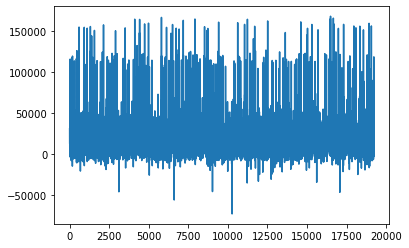

In [237]:
plt.plot(y_val)

In [228]:
submission=pd.read_csv('submission.csv')

In [229]:
X_test=pd.read_csv('X_test.csv')

In [231]:
y_pred=lin_reg.predict(X_test)

In [232]:
y_pred

array([51213.13691485, 24639.82773297, -1940.35641272, ...,
       33973.3576223 , 19699.75371766,  5705.60468759])

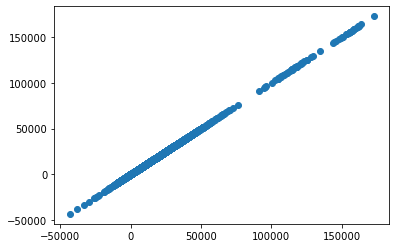

In [235]:
plt.scatter(y_pred,y_pred)

In [254]:
X_trian=pd.read_csv('X_train.csv')

In [271]:
X_train.head(5)

,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,1399.0,7,22,2010,1,3,3.5,186005,6.0,4,1,14,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1018.0,5,122,2011,0,1,3.0,192000,6.0,4,1,16,8,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,781.0,8,8,2006,0,1,1.3,200000,4.0,4,0,16,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,862.0,4,28,2011,1,3,2.5,168966,4.0,4,1,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,446.0,8,8,2014,1,1,1.3,91901,4.0,4,1,14,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [256]:
X_train.drop(['ID'],axis=1,inplace=True)

In [257]:
y_train

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19232     8467.0
19233    15681.0
19234    26108.0
19235     5331.0
19236      470.0
Name: Price, Length: 19237, dtype: float64

In [258]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [259]:
X_test=pd.read_csv('X_test.csv')

In [272]:
X_test.head(5)

,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Doors,Wheel,Color,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,784.0,10,52,2012,0,2,2.0,0,4.0,2,1,13,10,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,784.0,1,1,2012,1,1,2.4,26000,4.0,4,1,13,10,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,784.0,9,48,2005,0,1,1.5,168000,4.0,4,0,4,8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,975.0,33,301,2012,1,1,3.2,143000,6.0,4,1,12,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,784.0,13,26,1993,0,1,1.6,200000,4.0,4,1,16,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [261]:
X_test.drop(['ID'],axis=1,inplace=True)

In [265]:
lin_reg.predict(X_test)

array([51171.32786751, 24644.74684119, -1927.78014266, ...,
       33973.29748465, 19705.02911271,  5712.78461508])

In [266]:
from sklearn.tree import DecisionTreeRegressor

In [267]:
tree_reg=DecisionTreeRegressor()

In [273]:
X_train.shape,X_test.shape

((19237, 28), (8245, 28))

In [275]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [276]:
y_pred=tree_reg.predict(X_test)

In [277]:
y_pred

array([25500.        , 21953.        ,  8781.        , ...,
         540.15384615, 36235.        ,   706.        ])

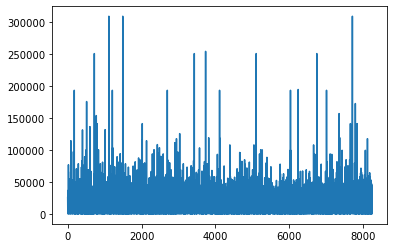

In [278]:
plt.plot(y_pred)

In [279]:
y_val=tree_reg.predict(X_train)

In [280]:
mean_squared_error(y_val,y_train)

3801613.415219019

In [281]:
submission['Price']=y_pred

In [283]:
submission.to_csv('submission.csv',index=False)

In [28]:
df=pd.read_csv('train.csv')

In [29]:
y_train=df['Price']

In [77]:
numerical_feature=[feature for feature in train.columns if train[feature].dtypes!='O']

In [78]:
numerical_feature

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [81]:
categorical_feature=[feature for feature in train.columns if train[feature].dtypes=='O']

In [10]:
categorical_feature

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [80]:
discrete_feature=[feature for feature in numerical_feature if train[feature].nunique()<25]
discrete_feature

['Cylinders', 'Airbags']

In [14]:
train['Cylinders'].nunique()

13

In [16]:
import seaborn as sns

In [82]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]

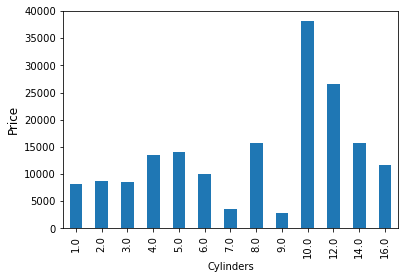

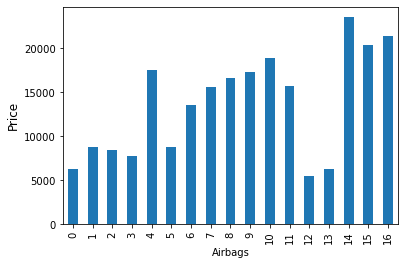

In [25]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)["Price"].median().plot.bar()
    plt.ylabel('Price',fontsize=12)
    plt.show()

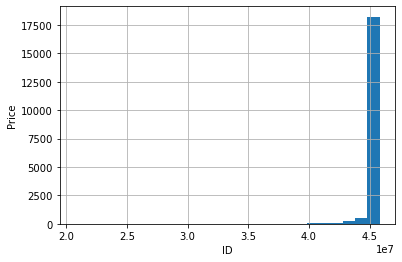

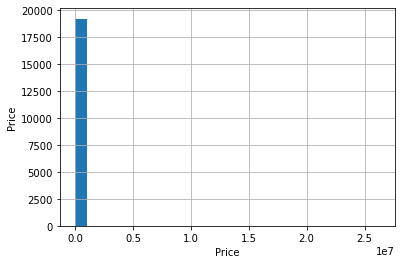

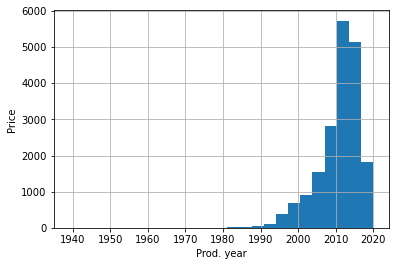

In [26]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

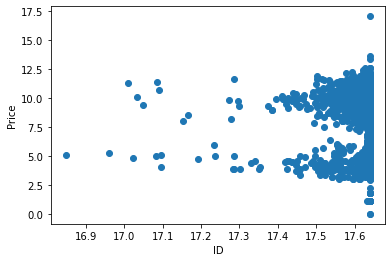

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


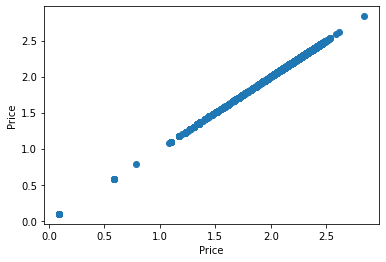

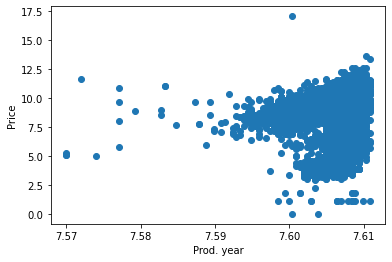

In [28]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in train[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data["Price"])
        
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

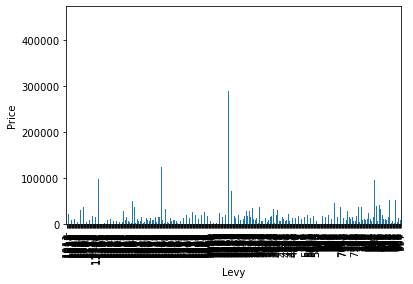

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

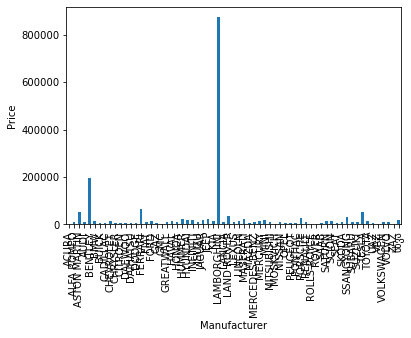

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

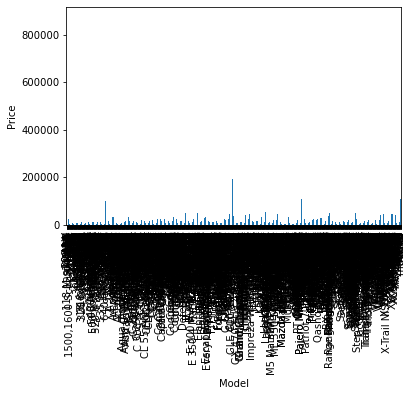

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

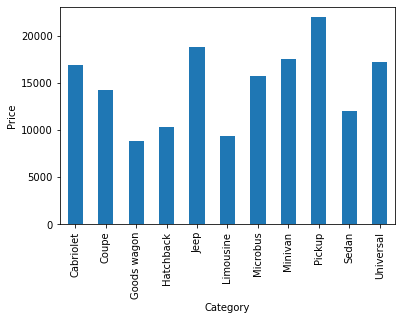

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

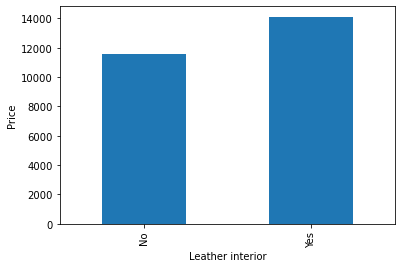

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

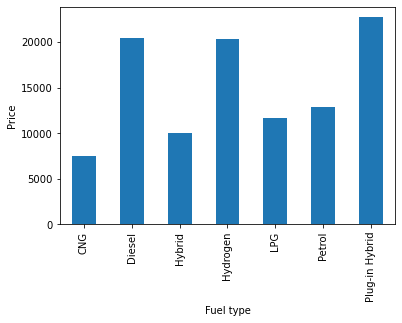

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

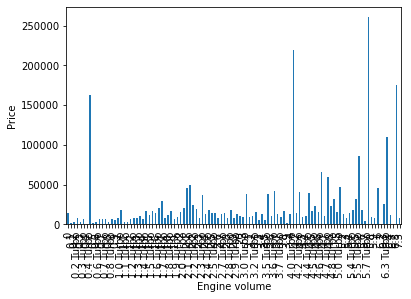

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

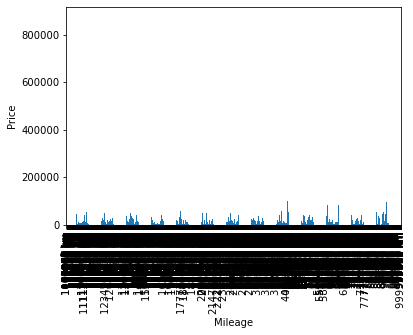

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

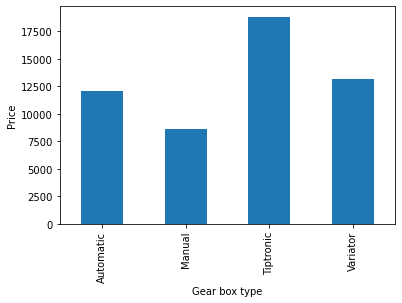

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

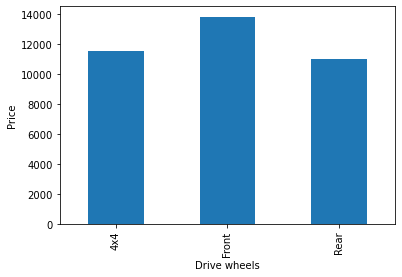

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

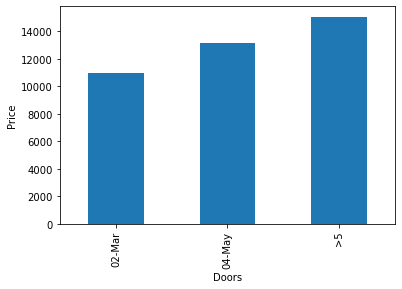

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

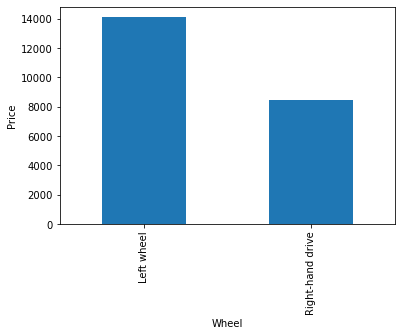

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

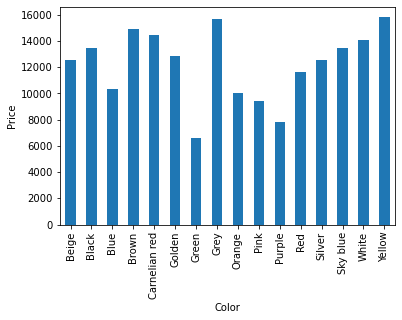

In [8]:
for feature in categorical_feature:
    data=train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [36]:
train_corr=train.corr()

<AxesSubplot:>

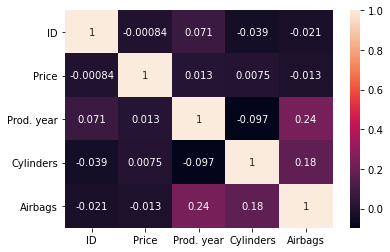

In [38]:
sns.heatmap(train_corr,annot=True)

In [9]:
print(train['Levy'].nunique())

559


In [83]:
test=pd.read_csv('test.csv')

In [96]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],axis=0)

In [50]:
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train
2,45774419,8467.0,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train


In [84]:
train['Levy']=np.where(train["Levy"]=='-','NaN',train['Levy'])
train['Levy'].replace('NaN',train['Levy'].median(),inplace=True)

In [85]:
train['Levy']=train['Levy'].astype(int)

In [86]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [87]:
test['Levy']=np.where(test['Levy']=='-','NaN',test["Levy"])
test['Levy'].replace('NaN',test['Levy'].median(),inplace=True)
test['Levy']=test['Levy'].astype(int)

In [88]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,784,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,784,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,784,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,784,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [89]:
ls=test['Engine volume'].str.contains('Turbo')
ls=ls[ls==1].index
ls

Int64Index([   0,    5,   17,   21,   26,   30,   44,   64,   73,   77,
            ...
            8088, 8094, 8107, 8136, 8139, 8140, 8181, 8183, 8221, 8241],
           dtype='int64', length=828)

In [90]:
test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)

<ipython-input-90-8a072c0c11a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [91]:
test['Engine volume']=test['Engine volume'].astype(float)

In [92]:
test['Engine volume'].dtypes

dtype('float64')

In [93]:
ls=train['Engine volume'].str.contains('Turbo')
ls[ls==1].index
train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)

<ipython-input-93-13cfe707a0ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [94]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [95]:
train['Engine volume']=train['Engine volume'].astype(float)

In [58]:
data['Manufacturer'].value_counts()[0:20]

HYUNDAI          5358
TOYOTA           5177
MERCEDES-BENZ    2983
FORD             1592
CHEVROLET        1520
BMW              1447
LEXUS            1433
HONDA            1391
NISSAN            944
VOLKSWAGEN        850
SSANGYONG         643
KIA               605
OPEL              587
MITSUBISHI        408
SUBARU            384
AUDI              375
MAZDA             258
JEEP              190
DAEWOO            134
DODGE             128
Name: Manufacturer, dtype: int64

In [97]:
def one_hot(data,variable):
    list_10=list(data[variable].value_counts().head(10).index)
    for category in list_10:
        data[category]=np.where(data[variable]==category,1,0)

In [102]:
data.head(5)

,ID,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5
0,45654403,13328.0,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44731507,16621.0,1018,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,781,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,45769185,3607.0,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45809263,11726.0,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
one_hot(data,'Manufacturer')

In [100]:
one_hot(data,'Model')

In [101]:
data.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [103]:
data['Category'].value_counts()

Sedan          12534
Jeep            7821
Hatchback       4038
Minivan          934
Coupe            746
Universal        523
Microbus         428
Goods wagon      310
Pickup            72
Cabriolet         61
Limousine         15
Name: Category, dtype: int64

In [104]:
data=pd.get_dummies(data,columns=['Category'],drop_first=True)

In [105]:
data['Leather interior']=np.where(data['Leather interior']=='Yes',1,0)

In [121]:
data.head(5)

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Drive wheels,Doors,Wheel,Color,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,45654403,13328.0,1399,2010,1,3.5,186005,6.0,4x4,04-May,Left wheel,Silver,12,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44731507,16621.0,1018,2011,0,3.0,192000,6.0,4x4,04-May,Left wheel,Black,8,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,45774419,8467.0,781,2006,0,1.3,200000,4.0,Front,04-May,Right-hand drive,Black,2,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,45769185,3607.0,862,2011,1,2.5,168966,4.0,4x4,04-May,Left wheel,White,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,45809263,11726.0,446,2014,1,1.3,91901,4.0,Front,04-May,Left wheel,Silver,4,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
data['Fuel type'].value_counts()

Petrol            14492
Diesel             5773
Hybrid             5089
LPG                1307
CNG                 701
Plug-in Hybrid      118
Hydrogen              2
Name: Fuel type, dtype: int64

In [108]:
data['Leather interior']=np.where(data['Leather interior']=='Yes',1,0)

In [110]:
data['Mileage']=data['Mileage'].str.replace('km','',regex=True)

In [115]:
data['Mileage']=data['Mileage'].astype(int)

In [118]:
data['Cylinders'].dtypes

dtype('float64')

In [119]:
data['Gear box type'].value_counts()

Automatic    19296
Tiptronic     4463
Manual        2675
Variator      1048
Name: Gear box type, dtype: int64

In [120]:
data=pd.get_dummies(data,columns=['Gear box type'],drop_first=True)

In [151]:
data.head()

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1399,2010,1,3.5,186005,6.0,4,12,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,1018,2011,0,3.0,192000,6.0,4,8,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,781,2006,0,1.3,200000,4.0,4,2,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,2011,1,2.5,168966,4.0,4,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,446,2014,1,1.3,91901,4.0,4,4,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [123]:
data['Drive wheels'].value_counts()

Front    18374
4x4       5802
Rear      3306
Name: Drive wheels, dtype: int64

In [124]:
data=pd.get_dummies(data,columns=['Drive wheels'],drop_first=True)

In [144]:
data['Doors'].value_counts()

4    26173
2     1129
5      180
Name: Doors, dtype: int64

In [133]:
data['Doors']=data['Doors'].str.replace('-May','')

In [136]:
data.drop(['Doos'],axis=1,inplace=True)

In [138]:
data['Doors']=data['Doors'].str.replace('-Mar','')

In [141]:
data['Doors']=data['Doors'].str.replace('>','')

In [143]:
data['Doors']=data['Doors'].astype(int)

In [146]:
data['Wheel'].value_counts()

Left wheel          25384
Right-hand drive     2098
Name: Wheel, dtype: int64

In [150]:
data=pd.get_dummies(data,columns=['Color'],drop_first=True)

In [149]:
data['Color'].value_counts()

Black            7196
White            6392
Silver           5422
Grey             3400
Blue             2011
Red               893
Green             463
Orange            358
Brown             270
Carnelian red     266
Golden            207
Beige             198
Sky blue          177
Yellow            145
Purple             53
Pink               31
Name: Color, dtype: int64

In [152]:
data.shape

(27482, 68)

In [153]:
df=data.copy()

In [154]:
train=data[data['source']=='train']

In [163]:
train

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,781,1999,1,2.0,300000,4.0,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19233,831,2011,1,2.4,161600,4.0,4,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19234,836,2010,1,2.0,116365,4.0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19235,1288,2007,1,2.0,51258,4.0,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
test=data[data['source']=='test']

In [165]:
test

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,784,2012,0,2.0,0,4.0,2,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,784,2012,1,2.4,26000,4.0,4,10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,784,2005,0,1.5,168000,4.0,4,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,975,2012,1,3.2,143000,6.0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,784,1993,0,1.6,200000,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357,2004,0,1.6,164000,4.0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8241,784,2012,1,2.8,156000,4.0,4,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8242,1646,2015,1,4.6,102907,8.0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8243,784,2017,1,1.5,3000,4.0,4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [160]:
y_train=train['Price']
print(y_train)

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19232     8467.0
19233    15681.0
19234    26108.0
19235     5331.0
19236      470.0
Name: Price, Length: 19237, dtype: float64


In [162]:
train.drop(['ID','Price','source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [164]:
test.drop(['ID','Price','source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [167]:
from sklearn.linear_model import LinearRegression

In [170]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [171]:
train.to_csv('X_train.csv',index=False)

In [172]:
test.to_csv('X_test.csv',index=False)

In [173]:
feature=[feature for feature in train.columns]

In [177]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.05,random_state=42))
feature_sel_model.fit(train,y_train)

C:\Users\Manan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346351800917168.7, tolerance: 69867499473.66425
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.05, random_state=42))

In [178]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
lin_reg=LinearRegression()

In [181]:
lin_reg.fit(train,y_train)

LinearRegression()

In [183]:
y_val=lin_reg.predict(train)

In [184]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_train)

36013204640.63407

In [185]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [186]:
scaler.fit(train[feature])

StandardScaler()

In [187]:
train.head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [189]:
scaler.transform(train[feature])

array([[ 1.35944988, -0.1610338 ,  0.61530571, ..., -0.07989006,
        -0.55170667, -0.07443618],
       [ 0.3826027 ,  0.01537891, -1.62520838, ..., -0.07989006,
        -0.55170667, -0.07443618],
       [-0.2250424 , -0.86668466, -1.62520838, ..., -0.07989006,
        -0.55170667, -0.07443618],
       ...,
       [-0.08402771, -0.1610338 ,  0.61530571, ..., -0.07989006,
        -0.55170667, -0.07443618],
       [ 1.07485661, -0.69027195,  0.61530571, ..., -0.07989006,
        -0.55170667, -0.07443618],
       [-0.29683169,  0.19179163,  0.61530571, ..., -0.07989006,
         1.81255737, -0.07443618]])

In [190]:
train=pd.DataFrame(scaler.transform(train[feature]),columns=feature)

In [194]:
train.head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1.359450,-0.161034,0.615306,1.357980,-0.027813,1.180937,0.183763,1.254005,-0.493624,-0.484892,-0.34781,-0.247575,-0.242569,-0.240157,4.311567,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,2.018180,-0.07989,-0.551707,-0.074436
1,0.382603,0.015379,-1.625208,0.788363,-0.027689,1.180937,0.183763,0.328091,-0.493624,-0.484892,-0.34781,-0.247575,4.122538,-0.240157,-0.231934,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,2.280676,-0.200858,-1.422413,-0.368962,-0.289122,1.679933,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,-0.551707,-0.074436
2,-0.225042,-0.866685,-1.625208,-1.148338,-0.027524,-0.485866,0.183763,-1.060780,-0.493624,-0.484892,-0.34781,-0.247575,-0.242569,-0.240157,-0.231934,4.323178,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,6.490939,-0.151028,-0.136723,-0.168646,-0.110727,2.399362,-0.630580,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,4.978641,0.703031,-0.368962,3.458748,1.679933,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,-0.551707,-0.074436
3,-0.017366,0.015379,0.615306,0.218745,-0.028165,-0.485866,0.183763,-1.523737,-0.493624,-0.484892,-0.34781,4.039187,-0.242569,-0.240157,-0.231934,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,1.812557,-0.074436
4,-1.083950,0.544617,0.615306,-1.148338,-0.029757,-0.485866,0.183763,-0.597823,-0.493624,-0.484892,-0.34781,-0.247575,-0.242569,-0.240157,-0.231934,4.323178,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,6.490939,-0.151028,-0.136723,-0.168646,-0.110727,2.399362,-0.630580,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,-0.200858,0.703031,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,2.018180,-0.07989,-0.551707,-0.0

In [192]:
lin_reg.fit(train,y_train)

LinearRegression()

In [193]:
y_val=lin_reg.predict(train)
mean_squared_error(y_val,y_train)

36013204640.63407

In [232]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4,include_bias=f)
train_poly=poly_reg.fit_transform(train)
X_poly=pd.DataFrame(train_poly)

In [233]:
X_poly

0         1         2         3         4         5         6     \
0       1.0  1.359450 -0.161034  0.615306  1.357980 -0.027813  1.180937   
1       1.0  0.382603  0.015379 -1.625208  0.788363 -0.027689  1.180937   
2       1.0 -0.225042 -0.866685 -1.625208 -1.148338 -0.027524 -0.485866   
3       1.0 -0.017366  0.015379  0.615306  0.218745 -0.028165 -0.485866   
4       1.0 -1.083950  0.544617  0.615306 -1.148338 -0.029757 -0.485866   
...     ...       ...       ...       ...       ...       ...       ...   
19232   1.0 -0.225042 -2.101574  0.615306 -0.350873 -0.025458 -0.485866   
19233   1.0 -0.096847  0.015379  0.615306  0.104821 -0.028317 -0.485866   
19234   1.0 -0.084028 -0.161034  0.615306 -0.350873 -0.029252 -0.485866   
19235   1.0  1.074857 -0.690272  0.615306 -0.350873 -0.030597 -0.485866   
19236   1.0 -0.296832  0.191792  0.615306  0.104821 -0.027794 -0.485866   

           7         8         9         10        11        12        13    \
0      0.183763  1.254005 -0.493624 -0.484892 -0.347810 -0.247575 -0.242569   
1      0.183763  0.328091 -0.493624 -0.484892 -0.347810 -0.247575  4.122538   
2      0.183763 -1.060780 -0.493624 -0.484892 -0.347810 -0.247575 -0.242569   
3      0.183763 -1.523737 -0.493624 -0.484892 -0.347810  4.039187 -0.242569   
4      0.183763 -0.597823 -0.493624 -0.484892 -0.347810 -0.247575 -0.242569   
...         ...       ...       ...       ...       ...       ...       ...   
19232 -4.774233 -0.366344 -0.493624 -0.484892  2.875131 -0.247575 -0.242569   
19233  0.183763  0.328091  2.025835 -0.484892 -0.347810 -0.247575 -0.242569   
19234  0.183763 -0.597823  2.025835 -0.484892 -0.347810 -0.247575 -0.242569   
19235  0.183763 -0.597823 -0.493624 -0.484892 -0.347810 -0.247575  4.122538   
19236  0.183763  1.254005  2.025835 -0.484892 -0.347810 -0.247575 -0.242569   

           14        15        16        17       18        19        20    \
0     -0.240157  4.311567 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
1     -0.240157 -0.231934 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
2     -0.240157 -0.231934  4.323178 -0.188488 -0.17616 -0.243768 -0.244246   
3     -0.240157 -0.231934 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
4     -0.240157 -0.231934  4.323178 -0.188488 -0.17616 -0.243768 -0.244246   
...         ...       ...       ...       ...      ...       ...       ...   
19232 -0.240157 -0.231934 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
19233 -0.240157 -0.231934 -0.231311 -0.188488 -0.17616  4.102261 -0.244246   
19234 -0.240157 -0.231934 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
19235 -0.240157 -0.231934 -0.231311 -0.188488 -0.17616 -0.243768 -0.244246   
19236 -0.240157 -0.231934 -0.231311 -0.188488 -0.17616  4.102261 -0.244246   

           21        22       23        24        25        26        27    \
0     -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
1     -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
2     -0.226406 -0.224369 -0.17027 -0.168809 -0.152462  6.490939 -0.151028   
3     -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
4     -0.226406 -0.224369 -0.17027 -0.168809 -0.152462  6.490939 -0.151028   
...         ...       ...      ...       ...       ...       ...       ...   
19232 -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
19233 -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
19234 -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061  6.621291   
19235 -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   
19236 -0.226406 -0.224369 -0.17027 -0.168809 -0.152462 -0.154061 -0.151028   

           28        29        30        31        32        33        34    \
0     -0.136723 -0.168646 -0.110727 -0.416777  1.585841 -0.023919 -0.127138   
1     -0.136723 -0.168646 -0.110727 -0.416777  1.585841 -0.023919 -0.127138   
2     -0.136723 -0.168646 -0.110727  2.399362 

In [234]:
poly_reg.fit(X_poly,y_train)

PolynomialFeatures()

In [238]:
X_poly.shape,y_train.shape

((19237, 2211), (19237,))

In [239]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

In [240]:
y_val=lin_reg2.predict(X_poly)
mean_squared_error(y_val,y_train)

33144386919.21085

In [215]:
from sklearn.pipeline import Pipeline
Input=[('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [217]:
sorted_zip = sorted(zip(train,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

In [223]:
len(poly_pred)

65

In [226]:
train

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1.359450,-0.161034,0.615306,1.357980,-0.027813,1.180937,0.183763,1.254005,-0.493624,-0.484892,-0.347810,-0.247575,-0.242569,-0.240157,4.311567,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,2.018180,-0.07989,-0.551707,-0.074436
1,0.382603,0.015379,-1.625208,0.788363,-0.027689,1.180937,0.183763,0.328091,-0.493624,-0.484892,-0.347810,-0.247575,4.122538,-0.240157,-0.231934,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,2.280676,-0.200858,-1.422413,-0.368962,-0.289122,1.679933,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,-0.551707,-0.074436
2,-0.225042,-0.866685,-1.625208,-1.148338,-0.027524,-0.485866,0.183763,-1.060780,-0.493624,-0.484892,-0.347810,-0.247575,-0.242569,-0.240157,-0.231934,4.323178,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,6.490939,-0.151028,-0.136723,-0.168646,-0.110727,2.399362,-0.630580,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,4.978641,0.703031,-0.368962,3.458748,1.679933,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,-0.551707,-0.074436
3,-0.017366,0.015379,0.615306,0.218745,-0.028165,-0.485866,0.183763,-1.523737,-0.493624,-0.484892,-0.347810,4.039187,-0.242569,-0.240157,-0.231934,-0.231311,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,-0.154061,-0.151028,-0.136723,-0.168646,-0.110727,-0.416777,1.585841,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,-0.495496,-0.07989,1.812557,-0.074436
4,-1.083950,0.544617,0.615306,-1.148338,-0.029757,-0.485866,0.183763,-0.597823,-0.493624,-0.484892,-0.347810,-0.247575,-0.242569,-0.240157,-0.231934,4.323178,-0.188488,-0.17616,-0.243768,-0.244246,-0.226406,-0.224369,-0.17027,-0.168809,-0.152462,6.490939,-0.151028,-0.136723,-0.168646,-0.110727,2.399362,-0.630580,-0.023919,-0.127138,-0.186557,-0.052062,-0.912097,-0.138877,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,-0.200858,0.703031,-0.368962,-0.289122,-0.595262,-0.279726,-0.099077,-0.096914,-0.087148,-0.130474,-0.375299,-0.115443,-0.036788,-0.045072,-0.185361,2.018180,-0.07989,-0.551707

In [88]:
train=pd.read_csv('X_train.csv')

In [91]:
train.shape

(19237, 65)

In [89]:
y_train=pd.read_csv('y_train.csv')

In [24]:
y_train

,Price
0,13328.0
1,16621.0
2,8467.0
3,3607.0
4,11726.0
...,...
19232,8467.0
19233,15681.0
19234,26108.0
19235,5331.0


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

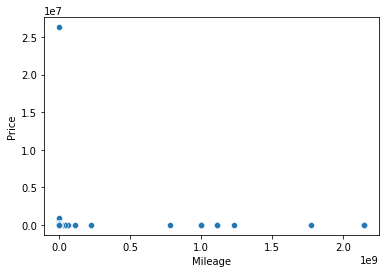

In [30]:
import seaborn as sns
sns.scatterplot(train['Mileage'],y_train)

In [121]:
features=['yearly','Cylinders','Levy','Engine volume','Doors','Airbags','nyears'] 

In [119]:
df['nyears']=2021-df['Prod. year']
df['yearly']=df['Mileage']/df['nyears']

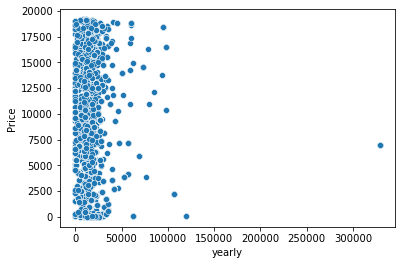

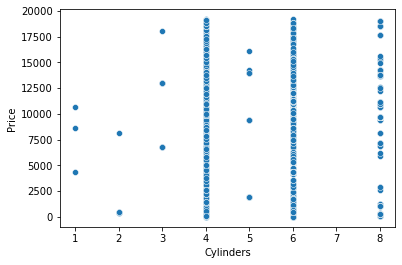

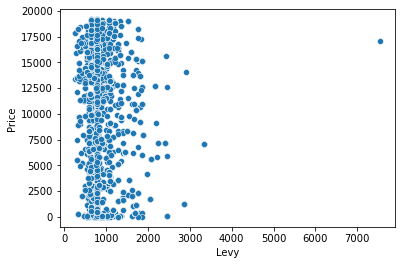

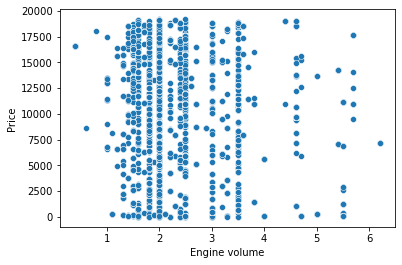

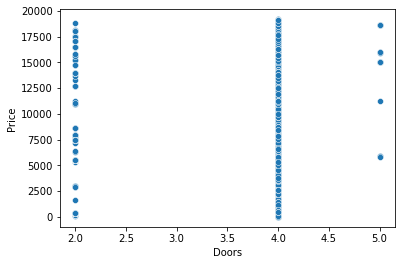

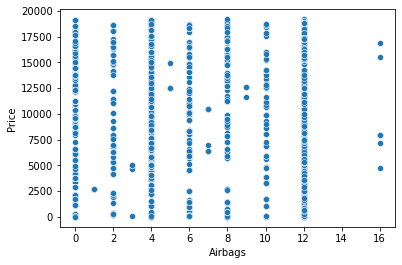

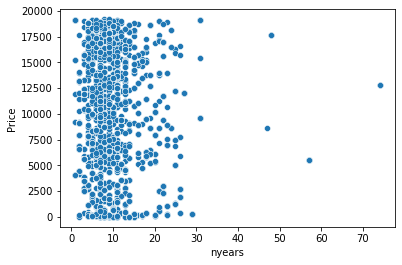

In [122]:
for feature in features:

    sns.scatterplot(data=df,x=feature,y='Price')
    plt.show()

In [130]:
train.drop(train[train['nyears']>=50].index,inplace=True)

In [141]:
train[train['yearly']>70000]

,Levy,Leather interior,Engine volume,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,nyears,yearly
65,765,1,2.0,4.0,4,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,1.199745e+05
281,765,1,2.0,4.0,4,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,9.706267e+04
414,1017,1,2.0,4.0,4,12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,7.106275e+04
493,777,0,2.5,4.0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,2.057143e+05
517,765,1,2.0,4.0,4,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,1.128042e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19086,1017,1,2.0,4.0,4,12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,7.106275e+04
19140,765,1,2.0,4.0,4,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,8.936867e+04
19167,1995,0,2.4,4.0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18,1.193046e+08
19199,781,0,1.8,5.0,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,26,4.273504e+07


In [103]:
train.shape

(19231, 65)

In [106]:
train[train['Prod. year']<=1970]


,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
3111,781,1953,0,2.0,0,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5488,781,1964,0,2.4,50000,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6607,781,1943,1,2.2,69000,4.0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7667,781,1965,1,4.7,68800,8.0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9026,781,1953,0,0.6,150000,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9493,781,1957,0,2.0,0,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10265,781,1939,1,5.0,129000,8.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11219,781,1939,1,2.4,126000,4.0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11927,781,1964,0,2.4,0,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12734,781,1968,1,2.4,2147483647,4.0,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
train[train['Mileage']>50000]

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,781,1999,1,2.0,300000,4.0,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19233,831,2011,1,2.4,161600,4.0,4,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19234,836,2010,1,2.0,116365,4.0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19235,1288,2007,1,2.0,51258,4.0,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
train['nyears']=2021-train['Prod. year']
train['yearly']=train['Mileage']/train['nyears']

In [113]:
train.drop(['Mileage','Prod. year'],axis=1,inplace=True)

In [163]:
train.drop(train[train['yearly']==0].index,inplace=True)

In [165]:
train.shape

(18498, 65)

In [166]:
train.to_csv('X_train1.csv')

(array([1.9214e+04, 1.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 1.65191050e+07, 3.30382100e+07, 4.95573149e+07,
        6.60764199e+07, 8.25955249e+07, 9.91146299e+07, 1.15633735e+08,
        1.32152840e+08, 1.48671945e+08, 1.65191050e+08]),
 <BarContainer object of 10 artists>)

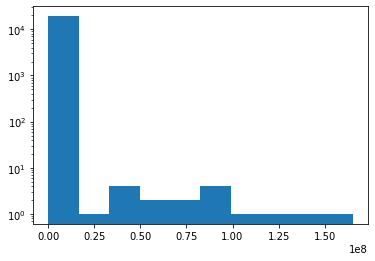

In [118]:
plt.hist(train['yearly'],bins=10,log=True)

In [142]:
df=pd.read_csv('train.csv')

In [143]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [160]:
df[df['Mileage']=='0 km']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
24,45813492,4704,-,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0 km,4.0,Automatic,Front,04-May,Left wheel,Green,4
26,45759112,549,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0 km,8.0,Automatic,4x4,04-May,Left wheel,White,0
83,45765301,8154,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,0 km,4.0,Automatic,4x4,04-May,Right-hand drive,White,2
97,45749534,4234,-,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,45791823,2900,-,BMW,320,1994,Sedan,Yes,Petrol,2,0 km,6.0,Manual,Rear,04-May,Left wheel,Green,2
19088,45782030,2200,-,PEUGEOT,406,2001,Sedan,No,Petrol,2,0 km,4.0,Manual,Front,04-May,Left wheel,White,2
19103,45748748,30,-,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Black,4
19218,45748699,30,-,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Green,9


In [84]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [172]:
ls=train.index
y_train=df['Price'][ls]

In [173]:
lin_reg.fit(train,y_train)

LinearRegression()

In [87]:
from sklearn.metrics import mean_squared_error


In [34]:
train.head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
train=pd.read_csv('X_train.csv')

In [6]:
train.shape

(19237, 65)

In [19]:
df=pd.read_csv('train.csv')

In [8]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [47]:
train.reset_index(drop=True)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,781,1999,1,2.0,300000,4.0,2,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19233,831,2011,1,2.4,161600,4.0,4,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19234,836,2010,1,2.0,116365,4.0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19235,1288,2007,1,2.0,51258,4.0,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:

data=pd.concat([df[["ID",'Price']],train],axis=1)
data.head()

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
y_train=data['Price']

In [70]:
mil=np.log(data['Mileage'])
mil

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        12.133529
1        12.165251
2        12.206073
3        12.037453
4        11.428467
           ...    
19232    12.611538
19233    11.992879
19234    11.664487
19235    10.844627
19236    12.138452
Name: Mileage, Length: 19237, dtype: float64

(0.0, 2000000.0, 0.0, 200000.0)

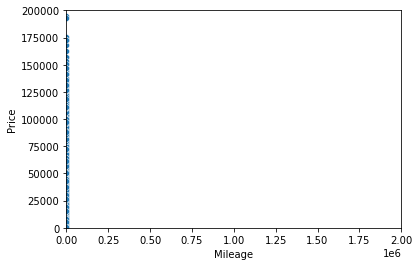

In [69]:
import seaborn as sns
sns.scatterplot(data=data,x=mil,y='Price')
plt.axis([0,2000000,0,200000])

In [72]:
data.to_csv('X_train.csv')

In [73]:
train['Mileage']=np.log(train['Mileage'])

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [74]:
train.head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399,2010,1,3.5,12.133529,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018,2011,0,3.0,12.165251,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,781,2006,0,1.3,12.206073,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862,2011,1,2.5,12.037453,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446,2014,1,1.3,11.428467,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
data.head(5)

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [78]:
train=data.drop(['ID','Price'],axis=1)

In [80]:
train.shape

(19237, 65)

In [81]:
train['Mileage']=np.where(train['Mileage']==0,train['Mileage'].mean(),train['Mileage'])

In [82]:
train['Mileage']=np.log(train['Mileage'])

In [95]:
train.drop(['Levy'],axis=1,inplace=True)

In [102]:
train.head(5)

,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,2010,1,3.5,12.133529,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2011,0,3.0,12.165251,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006,0,1.3,12.206073,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,1,2.5,12.037453,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2014,1,1.3,11.428467,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
y_train=data['Price']

In [97]:
lin_reg.fit(train,y_train)

LinearRegression()

In [98]:
y_val=lin_reg.predict(train)
mean_squared_error(y_val,y_train)

36002885677.53433

In [99]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(train,y_train)

DecisionTreeRegressor(max_depth=2)

In [100]:
y_val=tree_reg.predict(train)

In [101]:
mean_squared_error(y_val,y_train)

34927728902.97402

In [193]:
train=pd.read_csv('train.csv')

In [194]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [56]:
X_train=pd.read_csv('X_train.csv',index_col=0)

In [15]:
X_train.head(5)

,ID,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Sonata,Prius,Camry,Elantra,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,2010,1,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,1018,2011,0,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,781,2006,0,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,862,2011,1,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,446,2014,1,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
train.describe()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,1.859700e+04,1.859700e+04,18597.000000,18597.000000,18597.000000,18597.000000,18597.000000
mean,4.557154e+07,1.888964e+04,869.900307,2010.943969,129400.894015,4.589773,6.596655
std,9.504927e+05,1.938193e+05,392.332864,5.627125,81389.531450,1.205391,4.325881
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,1.000000,0.000000
25%,4.569485e+07,5.331000e+03,730.000000,2009.000000,68201.000000,4.000000,4.000000
50%,4.577238e+07,1.348500e+04,781.000000,2012.000000,123000.000000,4.000000,6.000000
75%,4.580191e+07,2.258000e+04,919.000000,2015.000000,180000.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,367000.000000,16.000000,16.000000


In [195]:
train['Levy']=np.where(train["Levy"]=='-','NaN',train['Levy'])
train['Levy'].replace('NaN',train['Levy'].median(),inplace=True)
train['Levy']=train['Levy'].astype(int)

In [196]:
train['Mileage']=train['Mileage'].str.replace('km','',regex=True)
train['Mileage']=train['Mileage'].astype(float)

In [197]:
Q1=train['Mileage'].quantile(0.25)
Q3=train['Mileage'].quantile(0.75)
IQR=Q3-Q1

<AxesSubplot:>

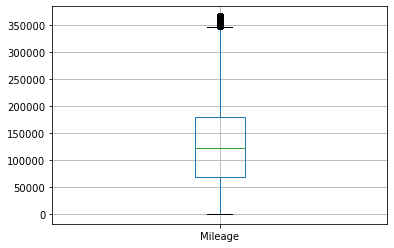

In [198]:
train=train.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
train.boxplot('Mileage')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18597 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18597 non-null  int64  
 1   Price             18597 non-null  int64  
 2   Levy              18597 non-null  int32  
 3   Manufacturer      18597 non-null  object 
 4   Model             18597 non-null  object 
 5   Prod. year        18597 non-null  int64  
 6   Category          18597 non-null  object 
 7   Leather interior  18597 non-null  object 
 8   Fuel type         18597 non-null  object 
 9   Engine volume     18597 non-null  object 
 10  Mileage           18597 non-null  float64
 11  Cylinders         18597 non-null  float64
 12  Gear box type     18597 non-null  object 
 13  Drive wheels      18597 non-null  object 
 14  Doors             18597 non-null  object 
 15  Wheel             18597 non-null  object 
 16  Color             18597 non-null  object

<AxesSubplot:>

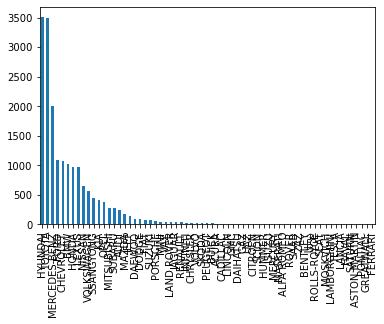

In [35]:
train['Manufacturer'].value_counts().plot(kind='bar')

In [199]:
test=pd.read_csv('test.csv')

In [200]:
test['Levy']=np.where(test["Levy"]=='-','NaN',test['Levy'])
test['Levy'].replace('NaN',test['Levy'].median(),inplace=True)
test['Levy']=test['Levy'].astype(int)

In [64]:
test.describe()

,ID,Levy,Prod. year,Cylinders,Airbags,Price
count,8.245000e+03,8245.000000,8245.000000,8245.000000,8245.000000,0.0
mean,4.558331e+07,878.018557,2010.911583,4.618799,6.519102,NaN
std,8.956823e+05,375.168373,5.548762,1.817581,4.350323,NaN
min,2.126522e+07,87.000000,1943.000000,1.000000,0.000000,NaN
25%,4.569648e+07,730.000000,2009.000000,4.000000,4.000000,NaN
50%,4.577163e+07,784.000000,2012.000000,4.000000,6.000000,NaN
75%,4.580180e+07,919.000000,2014.000000,4.000000,12.000000,NaN
max,4.581664e+07,7528.000000,2020.000000,127.000000,16.000000,NaN


In [201]:
test['Mileage']=test['Mileage'].str.replace('km','',regex=True)
test['Mileage']=test['Mileage'].astype(float)

In [202]:
Q1=test['Mileage'].quantile(0.25)
Q3=test['Mileage'].quantile(0.75)
IQR=Q3-Q1

<AxesSubplot:>

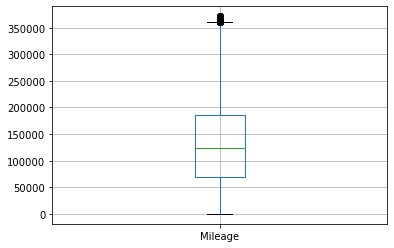

In [184]:
test=test.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
test.boxplot('Mileage')

In [203]:
train['source']='train'
test['source']='test'

In [206]:
data=pd.concat([train,test],axis=0)

In [211]:
data.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [210]:
data['Doors']=data['Doors'].str.replace('-May','')
data['Doors']=data['Doors'].str.replace('-Mar','')
data['Doors']=data['Doors'].str.replace('>','')
data['Doors']=data['Doors'].astype(int)

In [213]:
data.shape

(26842, 68)

In [207]:
one_hot(data,'Manufacturer')

In [208]:
one_hot(data,'Model')

In [209]:
data=pd.get_dummies(data,columns=['Category','Fuel type','Gear box type','Drive wheels','Leather interior','Wheel','Color'],drop_first=True)

In [204]:
ls=train['Engine volume'].str.contains('Turbo')
ls=ls[ls==1].index
train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)

<ipython-input-204-a87065a9e048>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [205]:
ls1=test['Engine volume'].str.contains('Turbo')
ls1=ls1[ls1==1].index
test['Engine volume'][ls1]=test['Engine volume'][ls1].str.replace('Turbo','',regex=True)

<ipython-input-205-6938a8131064>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Engine volume'][ls1]=test['Engine volume'][ls1].str.replace('Turbo','',regex=True)


In [99]:
train['Engine volume'].value_counts()

2       3634
2.5     2222
1.8     1678
1.6     1447
1.5     1302
        ... 
0.8        1
1.1        1
5.4        1
0.4        1
5.2        1
Name: Engine volume, Length: 106, dtype: int64

In [82]:
test.describe()

,ID,Levy,Prod. year,Mileage,Cylinders,Airbags,Price
count,7.994000e+03,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,0.0
mean,4.557832e+07,879.290218,2010.962847,132420.644734,4.626095,6.536277,NaN
std,9.087320e+05,376.800449,5.456331,83168.644525,1.838309,4.354031,NaN
min,2.126522e+07,87.000000,1943.000000,0.000000,1.000000,0.000000,NaN
25%,4.569106e+07,730.000000,2009.000000,69381.250000,4.000000,4.000000,NaN
50%,4.577161e+07,784.000000,2012.000000,124493.000000,4.000000,6.000000,NaN
75%,4.580174e+07,934.000000,2014.000000,185987.000000,5.000000,12.000000,NaN
max,4.581664e+07,7528.000000,2020.000000,371500.000000,127.000000,16.000000,NaN


In [50]:
def one_hot(data,variable):
    list_10=list(data[variable].value_counts().head(10).index)
    for category in list_10:
        data[category]=np.where(data[variable]==category,1,0)

In [81]:
train.head(5

SyntaxError: unexpected EOF while parsing (<ipython-input-81-1e629f9f0ec6>, line 1)

In [214]:
train=data[data['source']=='train']

In [215]:
train.head(5)

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Sonata,Elantra,Camry,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1399,2010,3.5,186005.0,6.0,4,12,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,1018,2011,3,192000.0,6.0,4,8,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,781,2006,1.3,200000.0,4.0,4,2,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,2011,2.5,168966.0,4.0,4,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,446,2014,1.3,91901.0,4.0,4,4,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [216]:
test=data[data['source']=='test']

In [217]:
test.head(5)

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Sonata,Elantra,Camry,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,44020629,NaN,784,2012,2.0,0.0,4.0,2,10,test,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,45784798,NaN,784,2012,2.4,26000.0,4.0,4,10,test,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,45800257,NaN,784,2005,1.5,168000.0,4.0,4,8,test,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,45797981,NaN,975,2012,3.2,143000.0,6.0,4,12,test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45814303,NaN,784,1993,1.6,200000.0,4.0,4,0,test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
train.to_csv('X_train.csv',index=False)

In [153]:
train.shape,train.index

((18597, 65), RangeIndex(start=0, stop=18597, step=1))

In [130]:
test.to_csv('X_test.csv',index=False)

In [131]:
y_train=train['Price']

In [133]:
train.drop(['ID','Price','source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [134]:
test.drop(['ID','Price','source'],axis=1,inplace=True)

In [137]:
train[train['Mileage']==0]

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Elantra,Camry,Sonata,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
11,781,1999,4,0.0,8.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,781,1995,1.8,0.0,4.0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
26,2455,2008,4.7,0.0,8.0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
83,781,1998,2,0.0,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
97,781,1997,1.4,0.0,4.0,2,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,781,1994,2,0.0,6.0,4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19088,781,2001,2,0.0,4.0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19103,781,2006,1.5,0.0,4.0,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19218,781,2006,1.3,0.0,4.0,4,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [136]:
test.head(5)

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Elantra,Camry,Sonata,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,784,2012,2.0,0.0,4.0,2,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,784,2012,2.4,26000.0,4.0,4,10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,784,2005,1.5,168000.0,4.0,4,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,975,2012,3.2,143000.0,6.0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,784,1993,1.6,200000.0,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [358]:
X=train.loc[:,train.columns!='Price']
y=train['Price']
X.drop(['ID'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
X.drop(['source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [359]:
X.head(5)

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399.00,2010,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018.00,2011,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,906.84,2006,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862.00,2011,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446.00,2014,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [360]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [361]:
scaler.fit(X)

StandardScaler()

In [362]:
X=pd.DataFrame(scaler.transform(X),columns=X.columns)

In [363]:
X.shape,y.shape

((18597, 55), (18597,))

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [365]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=0)
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)

In [367]:
print(np.sqrt(mse(y_val,y_pred)))

431388.6247832256


In [366]:
model.score(X_val,y_val)

0.0005946972043180399

In [249]:
model.fit(X,y)

RandomForestRegressor(random_state=1)

In [251]:
y

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19232     8467.0
19233    15681.0
19234    26108.0
19235     5331.0
19236      470.0
Name: Price, Length: 18597, dtype: float64

In [253]:
y_val=model.predict(X)
y_val

array([13363.21279248, 16610.9       ,  8505.78      , ...,
       25042.62      ,  5382.77      ,  2271.63333333])

In [258]:
from sklearn.metrics import mean_squared_error as mse

In [321]:
train=pd.read_csv('train.csv')

In [300]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.00,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906.84,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.00,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.00,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [322]:
train['Levy']=pd.to_numeric(train["Levy"],errors='coerce')

In [323]:
train['Levy']=train['Levy'].fillna(train['Levy'].mean())

In [324]:
train['Levy']=np.round(train['Levy'],2)

In [288]:
train['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
PONTIAC             1
TESLA               1
LANCIA              1
HAVAL               1
SATURN              1
Name: Manufacturer, Length: 65, dtype: int64

In [289]:
def one_hot(data,variable):
    list_10=list(data[variable].value_counts().head(10).index)
    for category in list_10:
        data[category]=np.where(data[variable]==category,1,0)

In [325]:
test=pd.read_csv('test.csv')

In [299]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,917.86,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,917.86,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,917.86,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975.00,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,917.86,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [326]:
test['Levy']=pd.to_numeric(test['Levy'],errors='coerce')

In [327]:
test['Levy']=test['Levy'].fillna(test['Levy'].mean())

In [328]:
test['Levy']=np.round(test['Levy'],2)

In [329]:
ls=test['Engine volume'].str.contains('Turbo')
ls=ls[ls==1].index

In [330]:
test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)
test['Engine volume']=test['Engine volume'].astype(float)


<ipython-input-330-4468ed967350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [331]:
ls=train['Engine volume'].str.contains('Turbo')
ls[ls==1].index
train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)

train['Engine volume']=train['Engine volume'].astype(float)

<ipython-input-331-cc9a9d8144ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)


<AxesSubplot:>

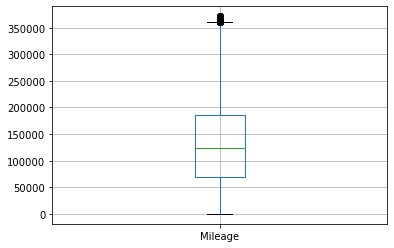

In [337]:
Q1=test['Mileage'].quantile(0.25)
Q3=test['Mileage'].quantile(0.75)
IQR=Q3-Q1

test=test.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
test.boxplot('Mileage')

<AxesSubplot:>

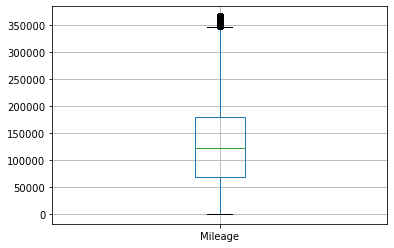

In [335]:
Q1=train['Mileage'].quantile(0.25)
Q3=train['Mileage'].quantile(0.75)
IQR=Q3-Q1

train=train.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
train.boxplot('Mileage')



In [338]:
train['source']='train'
test['source']='test'

In [339]:
data=pd.concat([train,test],axis=0)

In [347]:
data.shape

(26591, 58)

In [336]:


test['Mileage']=test['Mileage'].str.replace('km','',regex=True)
test['Mileage']=test['Mileage'].astype(int)

In [341]:
data.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,2.659100e+04,1.859700e+04,26591.000000,26591.000000,26591.000000,26591.000000,26591.000000,26591.000000
mean,4.557358e+07,1.888964e+04,911.489722,2010.949645,2.315280,130308.715731,4.600692,6.578504
std,9.381219e+05,1.938193e+05,383.116801,5.576234,0.887261,81938.577476,1.425578,4.334369
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000,1.000000,0.000000
25%,4.569385e+07,5.331000e+03,730.000000,2009.000000,1.800000,68700.000000,4.000000,4.000000
50%,4.577212e+07,1.348500e+04,906.840000,2012.000000,2.000000,123228.000000,4.000000,6.000000
75%,4.580187e+07,2.258000e+04,919.000000,2014.000000,2.500000,181957.500000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,371500.000000,127.000000,16.000000


In [343]:
data.drop(['Model','Manufacturer'],axis=1,inplace=True)

In [344]:
data=pd.get_dummies(data,columns=['Category','Fuel type','Gear box type','Drive wheels','Leather interior','Wheel','Color'],
                    drop_first=True)

In [342]:
one_hot(data,'Manufacturer')

In [317]:
data.drop(['Manufacturer'],axis=1,inplace=True)

In [345]:

data['Doors']=data['Doors'].str.replace('-May','')
data['Doors']=data['Doors'].str.replace('-Mar','')
data['Doors']=data['Doors'].str.replace('>','')
data['Doors']=data['Doors'].astype(int)

In [348]:
train=data[data['source']=='train']

In [349]:
test=data[data['source']=='test']

In [351]:
train.drop(['source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [354]:
test.head(5)

,ID,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,44020629,917.86,2012,2.0,0,4.0,2,10,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,45784798,917.86,2012,2.4,26000,4.0,4,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,45800257,917.86,2005,1.5,168000,4.0,4,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,45797981,975.00,2012,3.2,143000,6.0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45814303,917.86,1993,1.6,200000,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [353]:
test.drop(['Price','source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [356]:
train.to_csv('X_train.csv')

In [357]:
test.to_csv('X_test.csv')